#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Karen Marlyn Vinod**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset can also be downloaded from Kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/MyDrive/fake_news-detection-and-eval/fake.csv')
true_news_data = pd.read_csv('/content/drive/MyDrive/fake_news-detection-and-eval/true.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [ ]:
print("Fake News:")
display(fake_news_data.head())
print("True News:")
display(true_news_data.head())

Fake News:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


True News:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [ ]:
df = df.dropna()

**Q3.** shuffle the data.

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [ ]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",1
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",1
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",1
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",0
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",0


**Q4.** View the text content of a random data point.

In [ ]:
rnd_index = np.random.RandomState(42).randint(0, len(df))
print(f"\nRandom sample index: {rnd_index}")
print(df.loc[rnd_index, 'text'][:1000])


Random sample index: 15795
There are 20 Democrats who at certain times have called for Comey to be fired but all you hear this morning is that the firing was done by Trump to stop the Russia investigation. The hypocrisy is HUGE!These people are desperately trying to keep this ball moving down the field. The problem is that there is no  there  there in the Trump/Russia investigation.Even Maxine Waters said the Russia investigation has nothing on Trump:There is probably no one in Congress more openly opposed to President Donald Trump than Maxine Waters. We have already seen that she has called for Trump s impeachment. Therefore when even Waters states there is not yet any evidence at this time of Trump-Russia collusion, that is certainly significant. That is why it is astonishing that Washington Post opinion writer Jonathan Capehart left that significant admission made during his own podcast off his May 9 column about it.First let us listen to the segment of Capehart s podcast in which 

**Data Visualization**

Text(0, 0.5, 'Number of News')

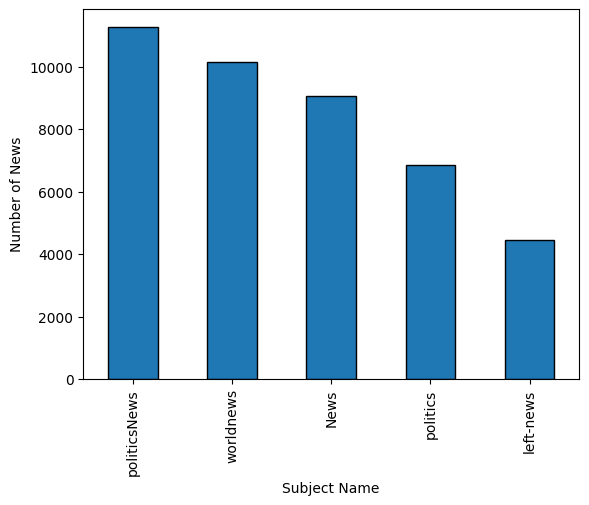

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on different subject.

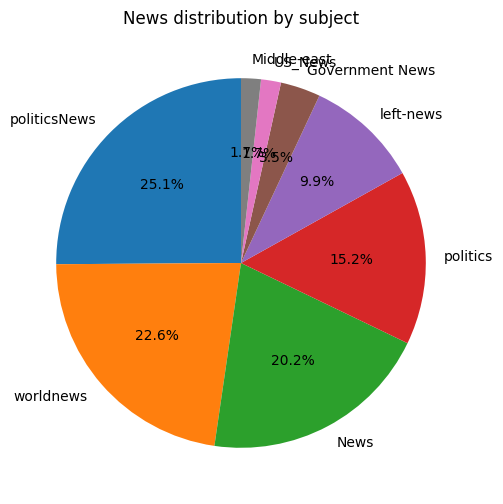

In [ ]:
plt.figure(figsize=(6,6))
df['subject'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('News distribution by subject')
plt.show()

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

' dr can erimtan 21st century wiredid donald j trump have any idea about the impact his words would have across the world did he have any idea that the whole wide world including the united nations would turn against him on wednesday 6 december 2017 in the white house s diplomatic reception room the president of the united states proceeded to make history or proceeded to leave his personal mark on the flow of world events as his words set a whole chain of global events in motion i have determined that it is time to officially recognize jerusalem as the capital of israel while previous presidents have made this a major campaign promise they failed to deliver today i am delivering in his preamble to this potentially explosive and arguably rather disconcerting statement trump explained that i n 1995 under bill clinton s watch that is congress adopted the jerusalem embassy act urging the federal government to relocate the american embassy to jerusalem and to recognize that that city and so

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
print("Train/test sizes:", x_train.shape, x_test.shape)

Train/test sizes: (33673,) (11225,)


## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 0]
Accuracy Score on Test Data:  0.9380846325167038


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9380846325167038
Precision: 0.945745780227351
Recall: 0.9352750809061489
F1 score: 0.9404812880020553


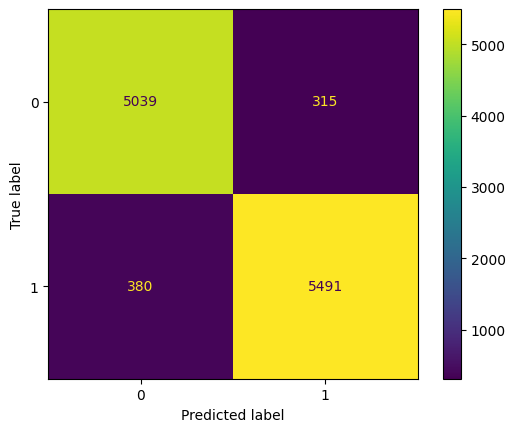

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for classfication purpose and predict the outcomes for test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(xv_train, y_train)

y_pred_rf = rf_model.predict(xv_test)
print("Random Forest - Prediction sample:", y_pred_rf[:20])

Random Forest - Prediction sample: [1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1]


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

In [ ]:
print('Random Forest Metrics:')
print('\nAccuracy:', accuracy_score(y_test, y_pred_rf))
print('\nPrecision:', precision_score(y_test, y_pred_rf))
print('\nRecall:', recall_score(y_test, y_pred_rf))
print('\nF1 score:', f1_score(y_test, y_pred_rf))

Random Forest Metrics:

Accuracy: 0.9382628062360802

Precision: 0.937035786630655

Recall: 0.9454948049735991

F1 score: 0.9412462908011869


#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/MyDrive/fake_news-detection-and-eval/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9380846325167038


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [ ]:
# --- Save Random Forest model as pickle ---
rf_pickle_path = '/content/drive/MyDrive/fake_news-detection-and-eval/random_forest_model.pickle'
with open(rf_pickle_path, 'wb') as f:
    pickle.dump(rf_model, f)
print("Random Forest model saved to:", rf_pickle_path)

# --- Save confusion matrix as SVG ---
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['True','Fake'])
disp.plot()
plt.title('Random Forest Confusion Matrix')

svg_path = '/content/drive/MyDrive/fake_news-detection-and-eval/rf_confusion_matrix.svg'
plt.savefig(svg_path, format='svg')
plt.close()
print("Confusion matrix saved as SVG to:", svg_path)

Random Forest model saved to: /content/drive/MyDrive/fake_news-detection-and-eval/random_forest_model.pickle
Confusion matrix saved as SVG to: /content/drive/MyDrive/fake_news-detection-and-eval/rf_confusion_matrix.svg


**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






AdaBoost Results:
Accuracy: 0.9078841870824054
Precision: 0.9159071367153913
Recall: 0.9071708397206609
F1 Score: 0.9115180557932568


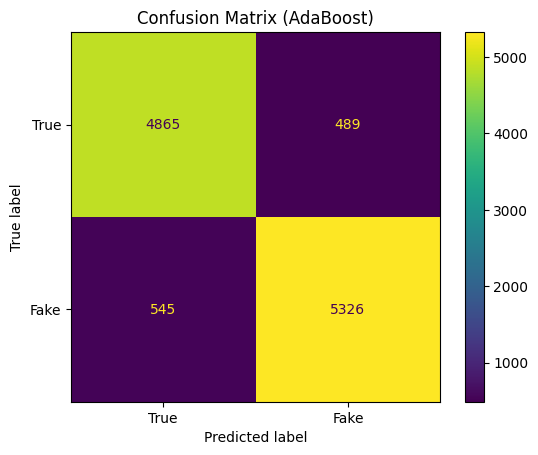

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# 2. Base learner: shallow decision tree (stump)
base = DecisionTreeClassifier(max_depth=2, random_state=42)

# 3. AdaBoost model
ada_model = AdaBoostClassifier(
    estimator=base,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

# 4. Train and evaluate
ada_model.fit(xv_train, y_train)
y_pred_ada = ada_model.predict(xv_test)

print("AdaBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))

# 5. Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (AdaBoost)")
plt.show()


In [ ]:
!pip install xgboost lightgbm

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:53:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.9292650334075724
Precision: 0.9368439167096885
Recall: 0.9272696303866462
F1 Score: 0.9320321862694744


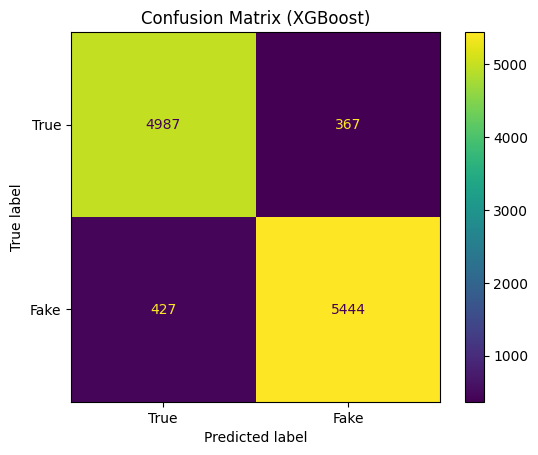

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(xv_train, y_train)
y_pred_xgb = xgb_model.predict(xv_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (XGBoost)")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results:
Accuracy: 0.9146547884187083
Precision: 0.9255153299844102
Recall: 0.9100664282064385
F1 Score: 0.9177258673995191


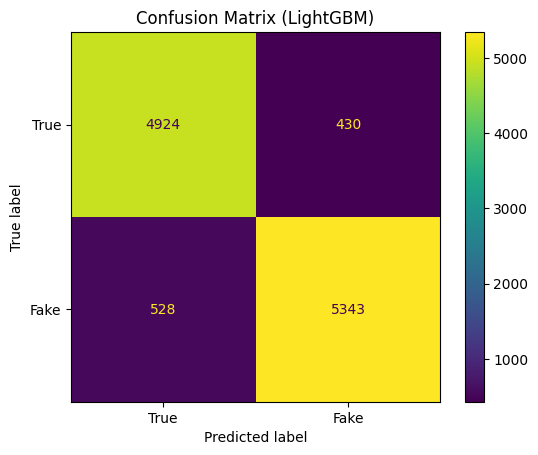

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)

lgb_model.fit(xv_train, y_train)
y_pred_lgb = lgb_model.predict(xv_test)

print("LightGBM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (LightGBM)")
plt.show()

## **With TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

xv_train = tfidf.fit_transform(x_train)
xv_test  = tfidf.transform(x_test)

print("TF-IDF vectors shape:", xv_train.shape)


TF-IDF vectors shape: (33673, 5000)


AdaBoost Results (TF-IDF):
Accuracy: 0.9944766146993318
Precision: 0.9972607430234549
Recall: 0.9921648782149549
F1 Score: 0.9947062841530054


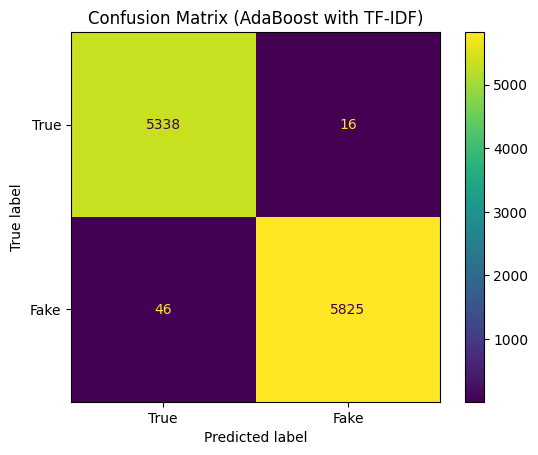

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

base = DecisionTreeClassifier(max_depth=2, random_state=42)

ada_model = AdaBoostClassifier(
    estimator=base,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_model.fit(xv_train, y_train)
y_pred_ada = ada_model.predict(xv_test)

print("AdaBoost Results (TF-IDF):")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))

cm_ada = confusion_matrix(y_test, y_pred_ada)
ConfusionMatrixDisplay(cm_ada, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (AdaBoost with TF-IDF)")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:57:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results (TF-IDF):
Accuracy: 0.995011135857461
Precision: 0.9976039705630669
Recall: 0.9928461931527849
F1 Score: 0.9952193955950145


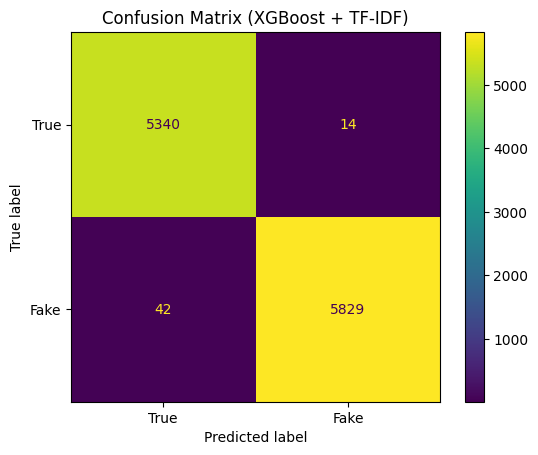

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(xv_train, y_train)
y_pred_xgb = xgb_model.predict(xv_test)

print("XGBoost Results (TF-IDF):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (XGBoost + TF-IDF)")
plt.show()


LightGBM Results (TF-IDF):
Accuracy: 0.9951002227171493
Precision: 0.9976043805612594
Recall: 0.9930165218872424
F1 Score: 0.9953051643192489


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


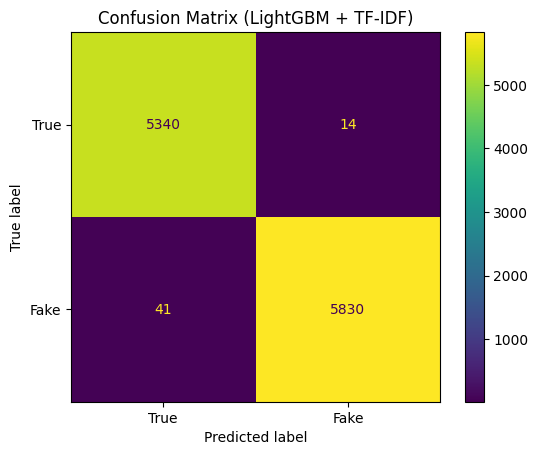

In [ ]:
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)

lgb_model.fit(xv_train, y_train)
y_pred_lgb = lgb_model.predict(xv_test)

print("LightGBM Results (TF-IDF):")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
ConfusionMatrixDisplay(cm_lgb, display_labels=['True','Fake']).plot()
plt.title("Confusion Matrix (LightGBM + TF-IDF)")
plt.show()

In [ ]:
!pip freeze > requirements.txt